In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from CZAR import *

In [2]:
H_in_kJmol = 2625.499639 # Hartree/kJmol
H_in_J  = 4.359744e-18
bohr2angs = 0.52917721092e0
kB      = 1.380648e-23      # J / K
H_to_u   = 2.921264912428e-8  # Hartree to mass unit
fs_to_au = 41.341374575751    # a.u. per fs
kB_a = kB / H_in_J
R = 8.314
T = 300.0

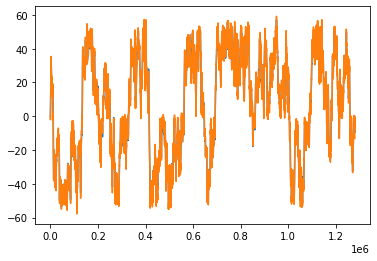

In [83]:
abf = pd.read_csv('CV_traj.dat', sep='\t')
abf.columns = ['time', 'Xi0', 'eXi0', '-']
plt.plot(abf['time'],abf['Xi0'])
plt.plot(abf['time'],abf['eXi0'])

In [269]:
ABF_out = pd.DataFrame(dtype=np.float64)
ABF_out = pd.read_csv('ABF_bias_out.txt',sep='\t')
ABF_out.columns = ['Bin','Xi','Hist','Mean Grad','Mean Force', 'dF', 'dF geom']

In [273]:
eABF_out = pd.DataFrame(dtype=np.float64)
eABF_out = pd.read_csv('eABF_bias_out.txt',sep='\t') # sigma=2.0 Bohr, tau=10000, N_full=100
eABF_out.columns = ['Bin','Xi','Hist','Mean Grad','Mean Force', 'dF', 'dF geom', 'dF/CZAR', 'dF/CZAR geom']

In [271]:
metaD_out = pd.DataFrame(dtype=np.float64)
metaD_out = pd.read_csv('metaD_bias_out.txt',sep='\t') # sigma=2.0 Bohr, height=0.1kJ/mol,tau=20 steps, dT=2000K
metaD_out.columns = ['Bin','Xi','Hist','Mean Grad','Mean Force', 'dF', 'dF geom']

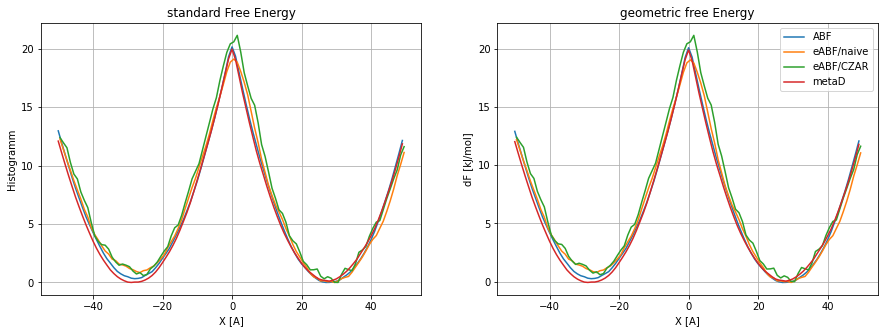

In [272]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

ax1.plot(ABF_out['Xi'],ABF_out['dF']*H_in_kJmol,label='ABF')
ax2.plot(ABF_out['Xi'],ABF_out['dF geom']*H_in_kJmol,label='ABF')

ax1.plot(eABF_out['Xi'],eABF_out['dF']*H_in_kJmol,label='eABF/naive')
ax2.plot(eABF_out['Xi'],eABF_out['dF geom']*H_in_kJmol,label='eABF/naive')

ax1.plot(eABF_out['Xi'],eABF_out['dF/CZAR']*H_in_kJmol,label='eABF/CZAR')
ax2.plot(eABF_out['Xi'],eABF_out['dF/CZAR']*H_in_kJmol,label='eABF/CZAR')

ax1.plot(metaD_out['Xi'],metaD_out['dF']*H_in_kJmol,label='metaD')
ax2.plot(metaD_out['Xi'],metaD_out['dF geom']*H_in_kJmol,label='metaD')

ax1.set_title('standard Free Energy')
ax2.set_title('geometric free Energy')
ax1.set_xlabel('X [A]')
ax1.set_ylabel('Histogramm')
ax2.set_xlabel('X [A]')
ax2.set_ylabel('dF [kJ/mol]')
ax1.grid()
ax2.grid()
plt.legend()

In [243]:
eABF_out

,Bin,Xi,Hist,Mean Grad,Mean Force,dF,dF geom,dF/CZAR,dF/CZAR geom
0,0,-49.5,1635.0,1.030776,-0.000342,0.004499,0.004470,0.004466,0.004437
1,1,-48.5,1667.0,1.030776,-0.000362,0.004158,0.004129,0.004256,0.004227
2,2,-47.5,1988.0,1.030776,-0.000328,0.003795,0.003767,0.004068,0.004040
3,3,-46.5,1884.0,1.030776,-0.000320,0.003468,0.003439,0.003616,0.003587
4,4,-45.5,2428.0,1.030776,-0.000317,0.003148,0.003119,0.003225,0.003196
...,...,...,...,...,...,...,...,...,...
95,95,45.5,2148.0,1.030776,0.000400,0.002468,0.002440,0.002793,0.002764
96,96,46.5,2298.0,1.030776,0.000413,0.002868,0.002839,0.003125,0.003097
97,97,47.5,2791.0,1.030776,0.000364,0.003281,0.003252,0.003403,0.003374
98,98,48.5,3362.0,1.030776,0.000376,0.003645,0.003616,0.003928,0.003899


In [390]:
out_1ox = pd.DataFrame(dtype=np.float64)
out_1ox = pd.read_csv('bias_out.txt',sep='\t') # sigma=2.0 Bohr, tau=10000, N_full=100
out_1ox.columns = ['Bin','Xi','Hist','Mean Grad','Mean Force', 'dF', 'dF geom']

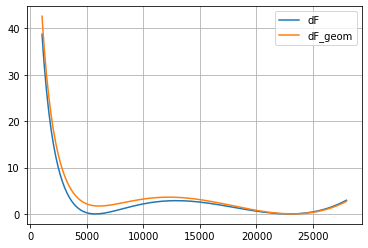

In [391]:
plt.plot(ABF_out_1ox['Xi'], ABF_out_1ox['dF']*H_in_kJmol,label='dF')
plt.plot(ABF_out_1ox['Xi'], ABF_out_1ox['dF geom']*H_in_kJmol, label='dF_geom')
plt.grid()
plt.legend()

In [278]:
ABF_out_1ox

,Bin,Xi,Hist,Mean Grad,Mean Force,dF,dF geom
0,0,0.0055,0.0,0.0,0.0,0.0,0.0
1,1,0.0065,0.0,0.0,0.0,0.0,0.0
2,2,0.0075,0.0,0.0,0.0,0.0,0.0
3,3,0.0085,0.0,0.0,0.0,0.0,0.0
4,4,0.0095,0.0,0.0,0.0,0.0,0.0
5,5,0.0105,0.0,0.0,0.0,0.0,0.0
6,6,0.0115,0.0,0.0,0.0,0.0,0.0
7,7,0.0125,0.0,0.0,0.0,0.0,0.0
8,8,0.0135,0.0,0.0,0.0,0.0,0.0
9,9,0.0145,0.0,0.0,0.0,0.0,0.0
